In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [10]:
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU is available:", gpu_available)
else:
    print("No GPU found.")

No GPU found.


In [11]:
TRAIN_DIR = 'data/train/'
VALIDATION_DIR = 'data/validation/'


```
.└── data/
    ├── train/
    |    ├── A/
    |    │   ├── a1.jpg
    |    │   ├── a2.jpg
    |    │   └── ...
    |    ├── B/
    |        ├── b1.jpg
    |        ├── b2.jpg
    |        └── ...
    |    ├── ...
    |    ├── I/
    |    |    ├── i1.jpg
    |    |    ├── i2.jpg
    |    |    └── ...
    |    ├── K/
    |    |    ├── k1.jpg
    |    |    ├── k2.jpg
    |    |    └── ...
    |    ├── ...
    |    └── Y/
    |        ├── y1.jpg
    |        ├── y2.jpg
    |        └── ...
    └── validation/
         ├── A/
         │   ├── a1.jpg
         │   ├── a2.jpg
         │   └── ...
         ├── B/
         |   ├── b1.jpg
         |   ├── b2.jpg
         |   └── ...
         ├── ...
         ├── I/
         |    ├── i1.jpg
         |    ├── i2.jpg
         |    └── ...
         ├── K/
         |    ├── k1.jpg
         |    ├── k2.jpg
         |    └── ...
         ├── ...
         └── Y/
             ├── y1.jpg
             ├── y2.jpg
             └── ...
```

Let's take a look at what the images look like.

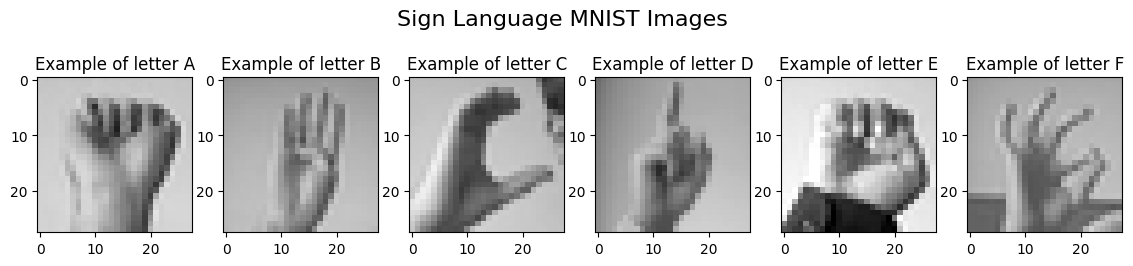

In [12]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Sign Language MNIST Images', fontsize=16)

# Plot one image from the first 4 letters
for ii, letter in enumerate(['A' , 'B', 'C', 'D', 'E', 'F']):
    dir = f'./data/train/{letter}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of letter {letter}')

By plotting the images with `matplotlib` you can readily see images have a resolution of 28x28 (look at the image axes) and are in greyscale, but you can double check this by using the code below:

In [13]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (28, 28, 3)


Don't worry about the last dimension. That is because the [`img_to_array`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array) function returns a 3D array. You can easily check that actually it has repeated the same values in each dimension, for example, take a look at the first 5 columns of the image. All you really care about is that your image is 28x28 pixels. 

In [14]:
sample_array[0,:5]

array([[152., 152., 152.],
       [155., 155., 155.],
       [158., 158., 158.],
       [159., 159., 159.],
       [162., 162., 162.]], dtype=float32)

In [ ]:

def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
   
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(28, 28),
		label_mode='categorical',
        color_mode = "grayscale", # Use this argument to get just one color dimension, because it is greyscale 
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(28, 28),
		label_mode='categorical',
        color_mode = "grayscale", # Use this argument to get just one color dimension, because it imgs are greyscale 
    ) 
    return train_dataset, validation_dataset

In [19]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   

Found 27455 files belonging to 24 classes.
Found 7173 files belonging to 24 classes.
Images of train dataset have shape: (None, 28, 28, 1)
Labels of train dataset have shape: (None, 24)
Images of validation dataset have shape: (None, 28, 28, 1)
Labels of validation dataset have shape: (None, 24)


In [120]:
# GRADED FUNCTION: create_model
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    ### START CODE HERE ###      
    
    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model = tf.keras.models.Sequential([ 
        # Define an input layer
        tf.keras.Input(shape=(28, 28, 1)), # Set correct input size
        # Rescale images
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(24, activation='softmax')
        ]) 

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    ### END CODE HERE ### 
    return model

The next cell allows you to check the number of total and trainable parameters of your model and prompts a warning in case these exceeds those of a reference solution, this serves the following 3 purposes listed in order of priority:

- Helps you prevent crashing the kernel during training.

- Helps you avoid longer-than-necessary training times.
- Provides a reasonable estimate of the size of your model. In general you will usually prefer smaller models given that they accomplish their goal successfully.


**Notice that this is just informative** and may be very well below the actual limit for size of the model necessary to crash the kernel. So even if you exceed this reference you are probably fine. However, **if the kernel crashes during training or it is taking a very long time and your model is larger than the reference, come back here and try to get the number of parameters closer to the reference.**

In [170]:
# Create your model
model = create_model()

Check that the input and output shape of your model are correct

In [171]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 28, 28, 1)
Output shape: (None, 24)


Expected output:

```
Input shape: (None, 28, 28, 1)
Output shape: (None, 24)
```

In [172]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,464 (240.09 KB)

 Trainable params: 61,464 (240.09 KB)

 Non-trainable params: 0 (0.00 B)


Check that the architecture you used is compatible with the dataset (you can ignore the warnings prompted by using the GPU):

In [173]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 24)


**Expected output:**

```
predictions have shape: (32, 24)
```

Finally, you can go ahead and train your model

In [174]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2127 - loss: 2.5706 - val_accuracy: 0.6966 - val_loss: 0.8911
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7029 - loss: 0.8685 - val_accuracy: 0.8323 - val_loss: 0.4624
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8201 - loss: 0.5221 - val_accuracy: 0.8818 - val_loss: 0.3509
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8775 - loss: 0.3570 - val_accuracy: 0.9062 - val_loss: 0.2852
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9074 - loss: 0.2736 - val_accuracy: 0.9115 - val_loss: 0.2765
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9317 - loss: 0.2034 - val_accuracy: 0.9180 - val_loss: 0.2965
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9424 - loss: 0.1727 - val_accuracy: 0.9028 - val_loss: 0.3207
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9492 - loss: 0.1520 - v

Now take a look at your training history:

In [1]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

NameError: name 'history' is not defined

In [176]:
# Save the model in H5 format
model.save('Project_ML_v3.h5')
print("Model saved to Project_ML_v3.h5")


Model saved to Project_ML_v3.h5


In [16]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Project_ML_v3.h5')
print("Model loaded successfully!")

Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


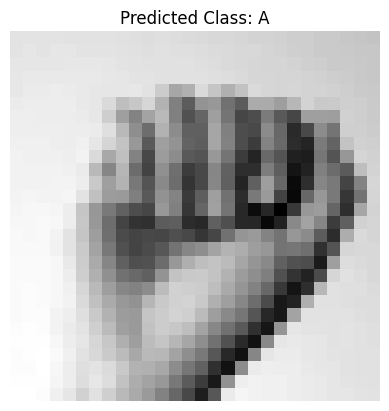

Predicted Probabilities: [9.9992287e-01 3.6918257e-15 1.6690164e-12 4.3925111e-12 5.5533622e-09
 1.7573699e-09 3.8091853e-18 5.6403809e-10 6.8347006e-05 2.1015303e-18
 2.0111347e-15 1.7280684e-07 4.1266780e-06 3.0814742e-10 1.1607863e-13
 7.4142716e-13 9.5922841e-22 4.4084795e-06 2.0191605e-11 1.6913108e-16
 3.6481829e-18 2.6118478e-18 4.0841388e-16 1.4157279e-08]
Predicted Class: A
True Label: A


In [20]:
classes_dict = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
    8: 'I', 9: 'K', 10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
    15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X',
    23: 'Y'
}

for images, labels in validation_dataset.take(1):
    predictions = loaded_model.predict(images)

    # Get the predicted class index for the 4th image in the batch
    index = predictions[3].argmax()

    # Displaying the 4th image in the batch and its predicted class
    plt.imshow(images[3].numpy(), cmap='gray')  # Display the 4th image
    plt.title(f"Predicted Class: {classes_dict[index]}")
    plt.axis('off')
    plt.show()

    # Print predicted probabilities and true label
    print("Predicted Probabilities:", predictions[3])
    print(f"Predicted Class: {classes_dict[index]}")

    # Handling one-hot encoded labels: Get the true label from one-hot encoding
    true_label_index = labels[3].numpy().argmax()
    print(f"True Label: {classes_dict[true_label_index]}")

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming the validation dataset is available as validation_dataset and the model as loaded_model
predictions = []
true_labels = []

# Predict the entire validation dataset
for images, labels in validation_dataset:
    # Make predictions
    preds = loaded_model.predict(images)
    predictions.extend(np.argmax(preds, axis=1))  # Predicted class indices
    true_labels.extend(np.argmax(labels.numpy(), axis=1))  # True class indices if one-hot encoded

# Convert predictions and true labels to numpy arrays for use in scikit-learn
predictions = np.array(predictions)
true_labels = np.array(true_labels)

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# True positives, false positives, false negatives, true negatives
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)

# Akurasi
accuracy = TP.sum() / cm.sum()

# Error Rate
error_rate = 1 - accuracy

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Presisi
precision = TP / (TP + FP)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(classification_report(true_labels, predictions, target_names=[classes_dict[i] for i in range(24)]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [22]:
print("Akurasi:", accuracy)
print("Error Rate:", error_rate)

Akurasi: 0.9050606440819741
Error Rate: 0.09493935591802594


In [23]:
# Macro Average
def macro_average(metrics):
    return np.mean(metrics)

# Calculate macro averages for each metric
recall_macro = macro_average(recall)
specificity_macro = macro_average(specificity)
precision_macro = macro_average(precision)
f1_macro = macro_average(f1_score)

print("Macro Average Recall:", recall_macro)
print("Macro Average Specificity:", specificity_macro)
print("Macro Average Precision:", precision_macro)
print("Macro Average F1-Score:", f1_macro)

# Weighted Average (use if you have the number of samples per class)
# You can multiply each class metric by the weight of its class (number of samples in each class).


Macro Average Recall: 0.9024948940836918
Macro Average Specificity: 0.9958734673956874
Macro Average Precision: 0.9050766762123151
Macro Average F1-Score: 0.8991835371685545
